### Import important libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
movie_reviews = pd.read_csv('IMDB Dataset.csv')

In [3]:
movie_reviews.shape

(50000, 2)

In [4]:
movie_reviews.columns

Index(['review', 'sentiment'], dtype='object')

In [5]:
movie_reviews['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [6]:
movie_reviews.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
mp = {
    'positive' : 1,
    'negative' : 0
}
movie_reviews['sentiment'] = movie_reviews['sentiment'].map(mp)

In [8]:
movie_reviews['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [9]:
print(movie_reviews.iloc[0, 0])
print(movie_reviews.iloc[0, 1])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [10]:
text, target = movie_reviews['review'].values, movie_reviews['sentiment'].values

In [11]:
text.shape, target.shape

((50000,), (50000,))

In [12]:
from sklearn.model_selection import train_test_split
text_train, text_test, y_train, y_test = train_test_split(text, target, test_size=0.3, random_state=17)

In [13]:
text_train.shape, text_test.shape, y_train.shape, y_test.shape

((35000,), (15000,), (35000,), (15000,))

In [14]:
def counts(arr):
    one, zero = 0, 0
    for i in range(0, arr.shape[0]):
        if arr[i] == 1:
            one+=1;
        else:
            zero+=1;
    
    return one, zero;

In [15]:
counts(y_train)

(17438, 17562)

In [16]:
counts(y_test)

(7562, 7438)

### A simple word count

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(text)

CountVectorizer()

In [18]:
len(cv.vocabulary_)

101895

In [19]:
print(cv.get_feature_names_out()[0:10])

['00' '000' '00000000000' '0000000000001' '00000001' '00001' '00015'
 '000dm' '000s' '001']


In [20]:
print(cv.get_feature_names_out()[10000:10010])

['bicyclist' 'bid' 'bidder' 'biddies' 'bidding' 'biddy' 'bide'
 'bidenesque' 'bidet' 'bidget']


### Converting it into sparse format

In [21]:
X_train = cv.transform(text_train)

In [22]:
X_train

<35000x101895 sparse matrix of type '<class 'numpy.int64'>'
	with 4763429 stored elements in Compressed Sparse Row format>

In [23]:
X_train.shape

(35000, 101895)

In [24]:
print(text_train[5])
print(y_train[5])

What an amazing film. With very little dialogue, the whole story is told with glances and body language. Very involving almost voyeuristic. My only gripe is that it has not been released on video in Australia and is therefore only available on TV. What a waste.
1


In [25]:
X_train[5].shape

(1, 101895)

### We need to see those words which are non zero

In [26]:
X_train[5].nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([ 3877,  4123,  4414,  4541,  6954,  7074,  9044, 11163, 24838,
        33226, 37534, 38992, 40745, 44763, 46557, 46765, 46902, 51323,
        53140, 60906, 62917, 64110, 64162, 74407, 86211, 90137, 90160,
        90294, 91338, 93369, 96714, 96879, 97584, 98190, 98847, 99139,
        99740]))

In [27]:
X_train[5].nonzero()[1]

array([ 3877,  4123,  4414,  4541,  6954,  7074,  9044, 11163, 24838,
       33226, 37534, 38992, 40745, 44763, 46557, 46765, 46902, 51323,
       53140, 60906, 62917, 64110, 64162, 74407, 86211, 90137, 90160,
       90294, 91338, 93369, 96714, 96879, 97584, 98190, 98847, 99139,
       99740])

### Building the test data

In [28]:
X_test = cv.transform(text_test)

In [29]:
X_test.shape

(15000, 101895)

### Train logistic regression

In [30]:
%%time
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(solver="lbfgs", n_jobs=-1, random_state=7)
logit.fit(X_train, y_train)

Wall time: 5.69 s


LogisticRegression(n_jobs=-1, random_state=7)

### Let's look at the accuracy on both training set and test set

In [31]:
logit.score(X_train, y_train)

0.9605714285714285

In [32]:
logit.score(X_test, y_test)

0.8874

### Observing Confusion matrix with accuracy and f1_score

In [33]:
from sklearn.metrics import confusion_matrix
predictions = logit.predict(X_test)
cm = confusion_matrix(y_test, predictions)

In [34]:
cm

array([[6544,  894],
       [ 795, 6767]], dtype=int64)

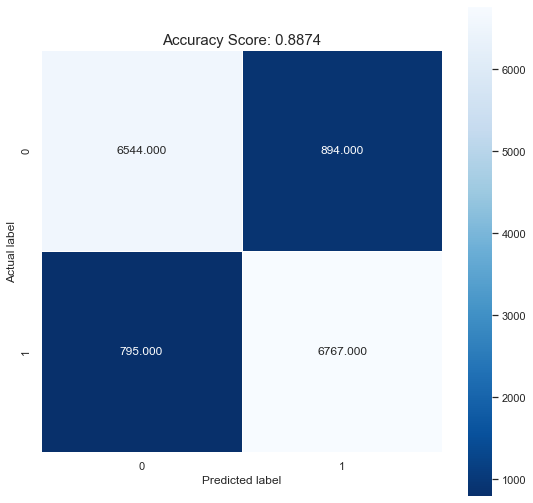

In [35]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logit.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [36]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions)

0.8890494646258951

### Observing Coefficients

In [37]:
logit.coef_

array([[-0.17084831, -0.03636823,  0.        , ...,  0.        ,
        -0.01857791, -0.01857791]])

In [38]:
logit.coef_.shape

(1, 101895)

In [39]:
logit.coef_.ravel()

array([-0.17084831, -0.03636823,  0.        , ...,  0.        ,
       -0.01857791, -0.01857791])

In [40]:
logit.coef_.ravel().shape

(101895,)

In [41]:
np.argsort(logit.coef_.ravel())[:25]

array([ 98190,  25428,  69434,  25426,  50960,  57756,  51631,  27677,
        51161, 100223,  34586,  60331,   7242,  89908,  31913,   7630,
        57154,  78459,   4888, 100204,  43009,  94694,  27196,  84055,
        10572], dtype=int64)

In [42]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(
        np.arange(1, 1 + 2 * n_top_features),
        feature_names[interesting_coefficients],
        rotation=60,
        ha="right",
    );

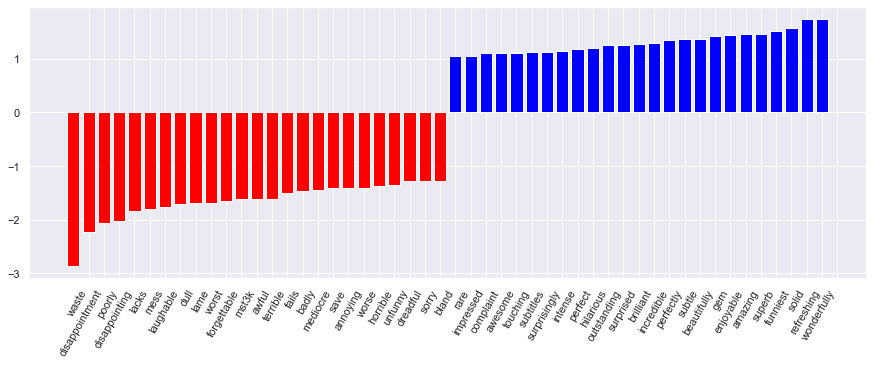

In [43]:
visualize_coefficients(logit, cv.get_feature_names_out())

### In this case, pipeline determines the correct sequence of actions: apply CountVectorizer, then train Logistic Regression.

In [44]:
%%time
from sklearn.pipeline import make_pipeline

text_pipe_logit = make_pipeline(
    CountVectorizer(),
    LogisticRegression(solver="lbfgs", n_jobs=1, random_state=7)
)

text_pipe_logit.fit(text_train, y_train)

Wall time: 17.2 s


C:\Users\Abhishek\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression',
                 LogisticRegression(n_jobs=1, random_state=7))])

In [45]:
print(text_pipe_logit.score(text_test, y_test))

0.8878666666666667


In [46]:
predictions = text_pipe_logit.predict(text_test)
cm = confusion_matrix(y_test, predictions)

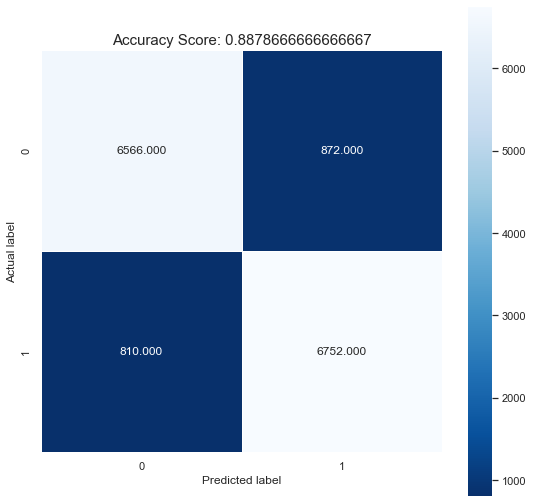

In [47]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(text_pipe_logit.score(text_test, y_test))
plt.title(all_sample_title, size = 15);

In [48]:
print(text_pipe_logit.score(text_train, y_train))

0.9614285714285714


### Appliying GridSearchCv to text_pipe_logit and varying logisticregression_coefficient

In [49]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid_logit = {"logisticregression__C": np.logspace(-5, 0, 6)}

grid_logit = GridSearchCV(
    text_pipe_logit, param_grid_logit, return_train_score=True, cv=3, n_jobs=-1
)

grid_logit.fit(text_train, y_train)

Wall time: 3min 52s


C:\Users\Abhishek\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression(n_jobs=1,
                                                           random_state=7))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
             return_train_score=True)

In [50]:
grid_logit.best_params_, grid_logit.best_score_

({'logisticregression__C': 0.1}, 0.8888285712470618)

In [51]:
def plot_grid_scores(grid, param_name):
    plt.plot(
        grid.param_grid[param_name],
        grid.cv_results_["mean_train_score"],
        color="green",
        label="train",
    )
    plt.plot(
        grid.param_grid[param_name],
        grid.cv_results_["mean_test_score"],
        color="red",
        label="test",
    )
    plt.legend();

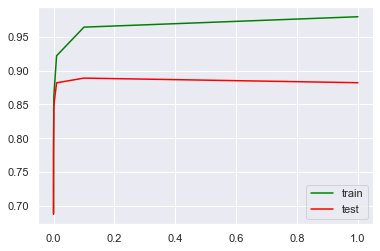

In [52]:
plot_grid_scores(grid_logit, "logisticregression__C")

### Now, let's apply RandomForestClassifier to this dataset

In [53]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=17)

In [54]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=17)

In [55]:
forest.score(X_test, y_test)

0.8660666666666667

In [56]:
predictions = forest.predict(X_test)
cm = confusion_matrix(y_test, predictions)

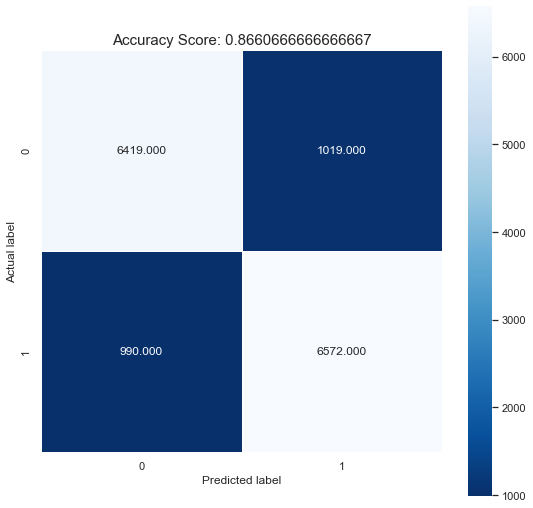

In [57]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(forest.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

### Now let's do it by putting ngram_range=(1, 2) in countvectorizer

In [58]:
%%time

text_pipe_logit2 = make_pipeline(
    CountVectorizer(ngram_range=(1, 2)),
    LogisticRegression(solver="lbfgs", n_jobs=1, random_state=7)
)

text_pipe_logit2.fit(text_train, y_train)

Wall time: 2min 10s


C:\Users\Abhishek\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('logisticregression',
                 LogisticRegression(n_jobs=1, random_state=7))])

In [59]:
text_pipe_logit2.score(text_train, y_train)

0.9999714285714286

In [60]:
text_pipe_logit2.score(text_test, y_test)

0.9072

In [61]:
predictions = text_pipe_logit2.predict(text_test)
cm = confusion_matrix(y_test, predictions)

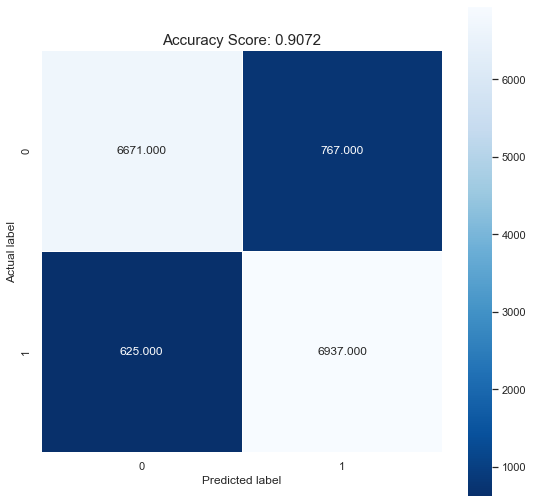

In [62]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(text_pipe_logit2.score(text_test, y_test))
plt.title(all_sample_title, size = 15);

### GridSearchCv

In [63]:
%%time
param_grid_logit2 = {"logisticregression__C": np.logspace(-5, 0, 6)}

grid_logit2 = GridSearchCV(
    text_pipe_logit2, param_grid_logit2, return_train_score=True, cv=3, n_jobs=-1
)

grid_logit2.fit(text_train, y_train)

Wall time: 19min 45s


C:\Users\Abhishek\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(ngram_range=(1, 2))),
                                       ('logisticregression',
                                        LogisticRegression(n_jobs=1,
                                                           random_state=7))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
             return_train_score=True)

In [64]:
grid_logit2.best_params_, grid_logit2.best_score_

({'logisticregression__C': 0.1}, 0.9003713508555288)

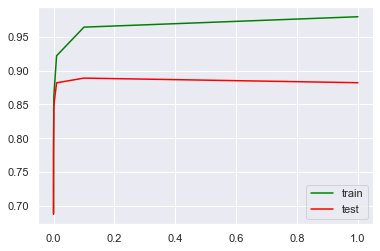

In [65]:
plot_grid_scores(grid_logit, "logisticregression__C")